#  <center> Telecom Customers Clustering  </center>
<h3> Customer Churn Analysis</h3>


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, normalize

### Import Data

In [25]:
df= pd.read_csv('Data1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
y = df['Churn']
y.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

<h1> Data Preprocessing </h1>

**convert the column values of TotalCharges to numerical**


In [28]:
df.TotalCharges = df['TotalCharges'].replace(' ', '0', regex=True)
df.TotalCharges = pd.to_numeric(df.TotalCharges)


**drop columns**


In [29]:

df = df.drop(['customerID','Churn'], axis=1).copy()


**numerical and categorical variables**


In [30]:

numerical_index = (df.dtypes != 'object')
numerical_features = list(numerical_index[numerical_index].index)
categorical_index = (df.dtypes == 'object')
categorical_features = list(categorical_index[categorical_index].index)


**standardize numerical variables**


In [31]:

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**encode categorical variables**


In [32]:

encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.115423,0.003437
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.385075,0.217564
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.354229,0.012453
3,1.0,0.0,0.0,0.0,0.625000,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.239303,0.211951
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.521891,0.017462


<h1> K-Means++ Clustering </h1>

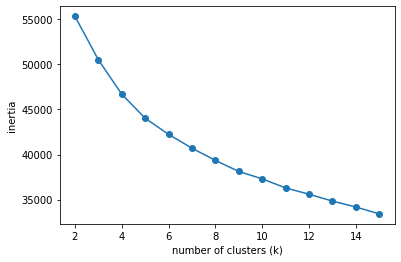

In [38]:
num_clusters = np.arange(2,16)
inertias = []

for k in num_clusters:
    model = KMeans(init='k-means++', n_clusters=k, random_state=0)
    model.fit(df)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

**(Note : From the above elbow chart, we can choose the optimal k vlaue  as 4.)**

In [39]:
model = KMeans(init='k-means++', n_clusters=4, random_state=0)
model.fit(df)

KMeans(n_clusters=4, random_state=0)

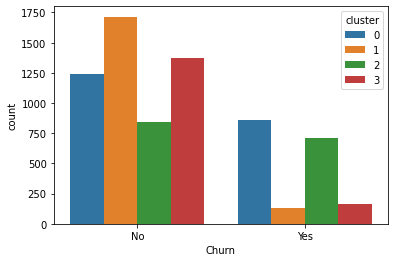

In [40]:
df['cluster'] = model.predict(df)
df['Churn'] = y
sns.countplot(x='Churn', hue="cluster", data=df)
plt.show()

 the customers has clustered into **4 different groups** with 2 groups having **high churn rates** and 2 groups having **low churn rates**

**By: Mahmoud Abd-ELmoaty**